### Description
***
This notebook is for plotting the Norm1 and Norm2 differences between HYCOM output and EN4 analyses in the horizontal dimensions.

The two sets of plots are defined by the following two equations, defining the Norms. Firstly, Norm1:

$$\frac{\text{ERROR}_{FREE} - \text{ERROR}_{EnOI}}{\text{ERROR}_{FREE}} \times 100$$

where the "ERROR" is defined as the '*mean absolute error*' and is the absolute difference between the EnOI run and the reference data, in this case the EN4 analysis. So the $\text{ERROR}_{EnOI/FREE}$ can be defined as $|\text{EnOI} - \text{EN4}|$.

Secondly, Norm2:

$$\frac{\text{RMSE}_{FREE} - \text{RMSE}_{EnOI}}{\text{RMSE}_{FREE}} \times 100$$

where the RMSE is calculated using the EN4 analysis as the 'truth' dataset.

***

The EN4-transformed HYCOM data used in these scripts was generated on Fram by:
1. Linking weekly averages into a single directory; then
2. Using `hycave` to create a monthly mean from the weekly averages; then
3. Renaming the hycave output prefixes to be recognised by hyc2proj; then
4. Performing `hyc2proj` with depths matching the EN4 objective analysis; and
5. Finally performing `ncrcat` to create a single netcdf of all the data.

The EN4 data used in these scripts was generated by:
1. Downloading the 4.2.2 analyses dataset from UKMO website; then
2. Loading all the individual monthly files into this notebook (see below, Aside 2); then
3. Converting the longitudes from 0--360 to -90--90 and sorting by longitude thereafter; then
4. Slicing and saving the dataset; and
5. Reassigning the time encoding from a single origin file (encoding somehow gets lost along the way); and
6. Finally saving the dataset as a netcdf for future use.

### From Francois's email:
***
***1)*** 
**Norm1** is equivalent to **mean absolute error**. 

In other word: $\text{mean} | (\text{obs}(:) - \text{mod}(:) |$


**Norm2** is equivalant to **RMSE**.

In other word: $\sqrt{(\text{mean}(\text{obs}(:) - \text{mod}(:))^{2})}$

**Bias** is $\text{mean}(\text{mod}) - \text{mean}(\text{obs})$

as bias can be negative you must take the abs before comparing two simulation 

e.g. plotting $|(\text{bias_free})| - |(\text{bias_assim})|$



***2)***
the *100 should be around parenthesis 

$(\frac{\text{error_free} - \text{error_assim}}{\text{error_free}}) * 100$

if error_free==error_assim ==> you get 0 (assim has not reduced error

if error_assim=0 ==> you get 100% you (have reduce all the error)

if error assim=2*error_free you get -100% (you have degraded the error)

Try to understand formula with simpler example like that
***

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from scipy import stats

In [7]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

## Aside
---
Just checking whether HYCOM and EN4 grids match up (spoiler, they probably don't)

In [3]:
ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-03','2012-02'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15
# ds_EN4 = ds_EN4.rename({'lat': 'latitude', 'lon': 'longitude'})

ds_EN4_new = xr.open_dataset('../Data/EN4_analyses/EN4_analyses.nc')
ds_EN4_new = ds_EN4_new.sel(time=slice('2009-03','2012-02'))
ds_EN4_new['temperature'] = ds_EN4_new['temperature'] - 273.15

# ds_cci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/CCI_hyc2proj_EN4a.nc')
# ds_cci = ds_cci.sel(time=slice('2009-03','2012-02'))

ds_cci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/HYCOM_CCI_EN4HGrid.nc')
ds_cci = ds_cci.sel(time=slice('2009-03','2012-02'))

# ds_l2l3 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/L2L3_EN4H.nc')
# ds_l2l3 = ds_l2l3.sel(time=slice('2009-03','2012-02'))
# ds_l2l3_gridTest = xr.open_dataset('../Data/L2L3_gridTest.nc')
# ds_l2l3_gridTest = ds_l2l3_gridTest.sel(longitude=slice(35,38), latitude=slice(-35, -30))
# ds_l2l3_gridTest_reg = xr.open_dataset('../Data/L2L3_gridTest_regular.nc')
# ds_l2l3_gridTest_reg = ds_l2l3_gridTest_reg.sel(longitude=slice(35,38), latitude=slice(-35, -30))
# ds_gc = xr.open_dataset('../Data/globcurrent_surface_regional.nc')
# ds_EN4 = ds_EN4.sel(lon=slice(35,38), lat=slice(-35, -30))

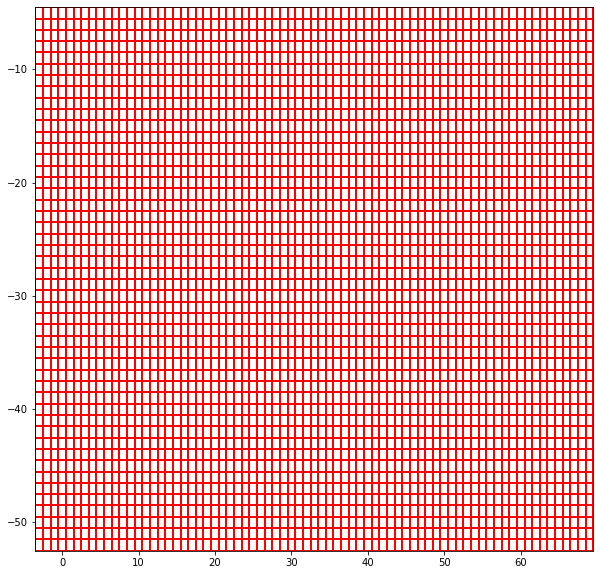

In [6]:
plt.rcParams["patch.force_edgecolor"]=True
plt.rcParams['pcolor.shading']='auto'

# plt.pcolormesh(ds_EN4['lon'], ds_EN4['lat'], ds_EN4['eastward_eulerian_current_velocity'][0],
#                cmap=plt.get_cmap('binary_r'), edgecolor='black', facecolor=None,
#                linewidth=0.15)
fig,ax = plt.subplots(1,1,figsize=(10,10))

plt.pcolormesh(ds_EN4_new['lon'], ds_EN4_new['lat'], ds_EN4_new['temperature'][0,0],
               edgecolor='k', facecolor='none',
               linewidth=0.2)
plt.pcolormesh(ds_EN4['lon'], ds_EN4['lat'], ds_EN4['temperature'][0,0],
               edgecolor='blue', facecolor='none',
               linewidth=0.2)
plt.pcolormesh(ds_cci['longitude'], ds_cci['latitude'], ds_cci['temperature'][0,0].squeeze(),
               edgecolor='red', facecolor='none',
               linewidth=0.2)
# plt.pcolormesh(ds_l2l3['longitude'], ds_l2l3['latitude'], ds_l2l3['temperature'][0,0].squeeze(),
#                edgecolor='blue', facecolor='none',
#                linewidth=0.2)
# plt.pcolormesh(ds_l2l3_gridTest['longitude'], ds_l2l3_gridTest['latitude'],
#                ds_l2l3_gridTest['u'][0].squeeze(),
#                edgecolor='green', facecolor='none',
#                linewidth=0.2)
# plt.pcolormesh(ds_l2l3_gridTest_reg['longitude'], ds_l2l3_gridTest_reg['latitude'],
#                ds_l2l3_gridTest_reg['u'][0].squeeze(),
#                edgecolor='orange', facecolor='none',
#                linewidth=0.2)

In [15]:
ds_cci['latitude']

<xarray.DataArray 'latitude' (latitude: 41)>
array([-50.      , -49.224796, -48.43724 , -47.63728 , -46.824883, -46.000023,
       -45.162678, -44.31284 , -43.45052 , -42.57572 , -41.688484, -40.788837,
       -39.87683 , -38.952538, -38.016033, -37.0674  , -36.106762, -35.134224,
       -34.149933, -33.154037, -32.1467  , -31.128113, -30.09847 , -29.057991,
       -28.006905, -26.945463, -25.87393 , -24.79259 , -23.70174 , -22.601696,
       -21.49279 , -20.375368, -19.249792, -18.116444, -16.975712, -15.828004,
       -14.673742, -13.513359, -12.347301, -11.176025, -10.      ],
      dtype=float32)
Coordinates:
  * latitude  (latitude) float32 -50.0 -49.22 -48.44 ... -12.35 -11.18 -10.0
Attributes:
    axis:           Y
    units:          degrees_north
    standard_name:  latitude

---

## Second aside
---

Here I am importing the latest EN4 data as a mf_dataset, subsetting and trying to save the mf_dataset as a single file.
I am also making sure that the grid is once again the same as the previous dataset and from this grid I will also get new bounds to ensure that the full HYCOM output can be reprojected for comparison. Currently parts of the HYCOM output are cut off.

### Testing import (works)

In [5]:
EN4 = xr.open_mfdataset('../Data/EN4_analyses/EN.4.2.2.*.nc')
EN4

<xarray.Dataset>
Dimensions:                          (depth: 42, lat: 173, lon: 360, time: 48,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -83.0 -82.0 ... 88.0 89.0
  * lon                              (lon) float32 1.0 2.0 3.0 ... 359.0 360.0
  * time                             (time) datetime64[ns] 2009-01-16T12:00:0...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 173, 360), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (time, depth, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

### Slicing for getting bounds for model domain (works)

Here I also had to convert the EN4 longitudes range from 0--360 to -90--90 and then sort by these adjusted longitudes to get the slice working.

In [6]:
EN4 = EN4.assign_coords(lon=(((EN4['lon'] + 180) % 360) - 180))
EN4 = EN4.sortby(EN4['lon'])
EN4 = EN4.sel(lat=slice(-52,-5), lon=slice(-3,69))
EN4

<xarray.Dataset>
Dimensions:                          (depth: 42, lat: 48, lon: 73, time: 48,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -52.0 -51.0 ... -6.0 -5.0
  * lon                              (lon) float32 -3.0 -2.0 -1.0 ... 68.0 69.0
  * time                             (time) datetime64[ns] 2009-01-16T12:00:0...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 48, 73), meta=np.ndarray>
    salinity                         (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 48, 73), meta=np.ndarray>
    temperature_uncertainty          (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 48, 73), meta=np.ndarray>
    salinity_uncertainty             (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 48, 73), meta=np.ndarray>
    temperature_observation_weights  (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 48, 73), meta=np.ndarray>
    salinity_observation_weights     (time, depth, lat, lon) float32 dask.array<chunksize=(1, 42, 48, 73), meta=np.ndarray>
    time_bnds                        (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    depth_bnds                       (time, depth, bnds) float32 dask.array<chunksize=(1, 42, 2), meta=np.ndarray>
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

### Plotting sanity check (all works)

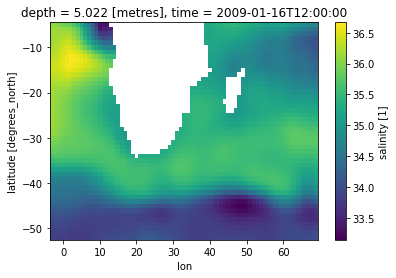

In [10]:
EN4['salinity'][0][0].plot()

### Saving

Here I also had to make a slight adjustment in order for the saving of the netcdf to succeed without issue. Through the above import and operations the time encoding somehow gets lost so I just copied the encoding from one of the single files in the mf_dataset (imported independently, below).

In [11]:
EN4_single = xr.open_mfdataset('../Data/EN4_analyses/EN.4.2.2.f.analysis.g10.200902.nc')
EN4.time.encoding['units'] = EN4_single.time.encoding['units']

In [12]:
EN4.to_netcdf('../Data/EN4_analyses/EN4_analyses.nc')

### Testing import of saved dataset

In [6]:
EN4_saved = xr.open_dataset('../Data/EN4_analyses/EN4_analyses.nc')
EN4_saved

<xarray.Dataset>
Dimensions:                          (depth: 42, lat: 48, lon: 73, time: 48,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 5.022 15.08 ... 5.35e+03
  * lat                              (lat) float32 -52.0 -51.0 ... -6.0 -5.0
  * lon                              (lon) float32 -3.0 -2.0 -1.0 ... 68.0 69.0
  * time                             (time) datetime64[ns] 2009-01-16T12:00:0...
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float32 ...
    salinity                         (time, depth, lat, lon) float32 ...
    temperature_uncertainty          (time, depth, lat, lon) float32 ...
    salinity_uncertainty             (time, depth, lat, lon) float32 ...
    temperature_observation_weights  (time, depth, lat, lon) float32 ...
    salinity_observation_weights     (time, depth, lat, lon) float32 ...
    time_bnds                        (time, bnds) datetime64[ns] ...
    depth_bnds                       (time, depth, bnds) float32 ...
Attributes: (12/22)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    southernmost_latitude:  -90.5
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...

### Another sanity check (works)

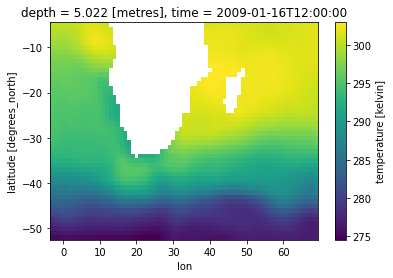

In [14]:
EN4_saved['temperature'][0][0].plot()

### Returning to first aside, above

Now I will return to the first aside, above, to import the saved dataset and check that its grid checks out (**spoiler**: it does, but HYCOM needs to be expanded).

---

In [3]:
# loading EN4 analysis data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_EN4 = xr.open_dataset('../Data/EN4_regional.nc')
# ds_EN4 = ds_EN4.sel(time=slice('2009-01','2009-09'))
# ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15
# ds_EN4 = ds_EN4.rename({'lat': 'latitude', 'lon': 'longitude'})

# loading EN4 analysis data
# !!! This is for loading of full experiment time period !!!
ds_EN4 = xr.open_dataset('../Data/EN4_analyses/EN4_analyses.nc')
ds_EN4 = ds_EN4.sel(time=slice('2009-03','2012-02'))
ds_EN4['temperature'] = ds_EN4['temperature'] - 273.15
ds_EN4 = ds_EN4.rename({'lat': 'latitude', 'lon': 'longitude'})

#-------------------------------------------------------------------------------

# loading HYCOMcci data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_hycomcci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/CCI_SEN25_EN4H.nc')
# ds_hycomcci['time'].values = ds_EN4['time'].values
# ds_hycomcci['latitude'].values = ds_EN4['latitude'].values
# ds_hycomcci['longitude'].values = ds_EN4['longitude'].values
# ds_hycomcci['depth'].values = ds_EN4['depth'].values

# loading HYCOMcci data
# !!! This is for loading of full experiment time period !!!
ds_hycomcci = xr.open_dataset('../Data/HYCOM_EN4_horizontal/HYCOM_CCI_EN4HGrid.nc')
ds_hycomcci = ds_hycomcci.sel(time=slice('2009-03','2012-02'))
ds_hycomcci = ds_hycomcci.assign_coords(time = ds_EN4['time'].values)
ds_hycomcci = ds_hycomcci.assign_coords(depth = ds_EN4['depth'].values)

#-------------------------------------------------------------------------------

# loading HYCOMostia data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_hycomostia = xr.open_dataset('../Data/HYCOM_EN4_horizontal/OSTIA_SEN30_EN4H.nc')
# ds_hycomostia['time'].values = ds_EN4['time'].values
# ds_hycomostia['latitude'].values = ds_EN4['latitude'].values
# ds_hycomostia['longitude'].values = ds_EN4['longitude'].values
# ds_hycomostia['depth'].values = ds_EN4['depth'].values

# loading HYCOMostia data
# !!! This is for loading of full experiment time period !!!
ds_hycomostia = xr.open_dataset('../Data/HYCOM_EN4_horizontal/HYCOM_OSTIA_EN4HGrid.nc')
ds_hycomostia = ds_hycomostia.sel(time=slice('2009-03','2012-02'))
ds_hycomostia = ds_hycomostia.assign_coords(time = ds_EN4['time'].values)
ds_hycomostia = ds_hycomostia.assign_coords(depth = ds_EN4['depth'].values)

#-------------------------------------------------------------------------------

# loading HYCOMl2l3 data
# !!! This is for loading of full experiment time period !!!
# ds_hycoml2l3 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/HYCOM_L2L3_EN4H.nc')
# ds_hycoml2l3 = ds_hycoml2l3.sel(time=slice('2009-03','2012-02'))
# ds_hycoml2l3 = ds_hycoml2l3.assign_coords(time = ds_EN4['time'].values)
# ds_hycoml2l3 = ds_hycoml2l3.assign_coords(depth = ds_EN4['depth'].values)

#-------------------------------------------------------------------------------

# loading HYCOMl2p_all data
# !!! This is for loading of full experiment time period !!!
# ds_hycoml2 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/HYCOM_L2P_EN4H.nc')
# ds_hycoml2 = ds_hycoml2.sel(time=slice('2009-03','2012-02'))
# ds_hycoml2 = ds_hycoml2.assign_coords(time = ds_EN4['time'].values)
# ds_hycoml2 = ds_hycoml2.assign_coords(depth = ds_EN4['depth'].values)

#-------------------------------------------------------------------------------

# # loading AVHRR data
# ds_hycomTSSTL2 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL2_SEN50_EN4H.nc')
# ds_hycomTSSTL2['time'].values = ds_EN4['time'].values
# ds_hycomTSSTL2['latitude'].values = ds_EN4['latitude'].values
# ds_hycomTSSTL2['longitude'].values = ds_EN4['longitude'].values
# ds_hycomTSSTL2['depth'].values = ds_EN4['depth'].values

# #-------------------------------------------------------------------------------

# # loading ATSR data
# ds_hycomTSSTL3 = xr.open_dataset('../Data/HYCOM_EN4_horizontal/TSSTL3_SEN40_EN4H.nc')
# ds_hycomTSSTL3['time'].values = ds_EN4['time'].values
# ds_hycomTSSTL3['latitude'].values = ds_EN4['latitude'].values
# ds_hycomTSSTL3['longitude'].values = ds_EN4['longitude'].values
# ds_hycomTSSTL3['depth'].values = ds_EN4['depth'].values

#-------------------------------------------------------------------------------

# loading HYCOMFree data
# !!! This is for loading of sensitivity experiment time period !!!
# ds_hycomfree = xr.open_dataset('../Data/HYCOM_EN4_horizontal/FREE_EN4H.nc')
# ds_hycomfree['time'].values = ds_EN4['time'].values
# ds_hycomfree['latitude'].values = ds_EN4['latitude'].values
# ds_hycomfree['longitude'].values = ds_EN4['longitude'].values
# ds_hycomfree['depth'].values = ds_EN4['depth'].values

# loading HYCOMFree data
# !!! This is for loading of full experiment time period !!!
ds_hycomfree = xr.open_dataset('../Data/HYCOM_EN4_horizontal/HYCOM_FREE_EN4Grid.nc')
ds_hycomfree = ds_hycomfree.sel(time=slice('2009-03','2012-02'))
ds_hycomfree = ds_hycomfree.assign_coords(time = ds_EN4['time'].values)
ds_hycomfree = ds_hycomfree.assign_coords(depth = ds_EN4['depth'].values)

## Creating the Norms

In [4]:
# Defining functions to calculate absolute error and RMSE
def abs_err(dataset,variable):
    absolute_error = (np.absolute(ds_EN4[variable] 
                                  - dataset[variable])).mean(dim = 'time',
                                                             skipna=True)
    return absolute_error

def rmse(dataset,variable):
    rmse_ = np.sqrt((np.square(ds_EN4[variable] 
                               - dataset[variable])).mean(dim = 'time',
                                                          skipna=True))
    return rmse_

In [6]:
# Norm 1 (Mean absolute error)
#==========================================================================================

# norm for CCI analysis
cci_sst_norm1 = (((abs_err(ds_hycomfree,'temperature')
                   - abs_err(ds_hycomcci,'temperature'))
                  / abs_err(ds_hycomfree,'temperature')) * 100)
cci_sst_norm2 = (((rmse(ds_hycomfree,'temperature')
                   - rmse(ds_hycomcci,'temperature'))
                  / rmse(ds_hycomfree,'temperature')) * 100)

cci_sal_norm1 = (((abs_err(ds_hycomfree,'salinity')
                   - abs_err(ds_hycomcci,'salinity'))
                  / abs_err(ds_hycomfree,'salinity')) * 100)
cci_sal_norm2 = (((rmse(ds_hycomfree,'salinity')
                   - rmse(ds_hycomcci,'salinity'))
                  / rmse(ds_hycomfree,'salinity')) * 100)

# norm for OSTIA analysis
ostia_sst_norm1 = (((abs_err(ds_hycomfree,'temperature')
                     - abs_err(ds_hycomostia,'temperature'))
                    / abs_err(ds_hycomfree,'temperature')) * 100)
ostia_sst_norm2 = (((rmse(ds_hycomfree,'temperature')
                     - rmse(ds_hycomostia,'temperature'))
                    / rmse(ds_hycomfree,'temperature')) * 100)

ostia_sal_norm1 = (((abs_err(ds_hycomfree,'salinity')
                     - abs_err(ds_hycomostia,'salinity'))
                    / abs_err(ds_hycomfree,'salinity')) * 100)
ostia_sal_norm2 = (((rmse(ds_hycomfree,'salinity')
                     - rmse(ds_hycomostia,'salinity'))
                    / rmse(ds_hycomfree,'salinity')) * 100)

# norm for l2l3 analysis
l2l3_sst_norm1 = (((abs_err(ds_hycomfree,'temperature')
                    - abs_err(ds_hycoml2l3,'temperature'))
                   / abs_err(ds_hycomfree,'temperature')) * 100)
l2l3_sst_norm2 = (((rmse(ds_hycomfree,'temperature')
                    - rmse(ds_hycoml2l3,'temperature'))
                   / rmse(ds_hycomfree,'temperature')) * 100)

l2l3_sal_norm1 = (((abs_err(ds_hycomfree,'salinity')
                    - abs_err(ds_hycoml2l3,'salinity'))
                   / abs_err(ds_hycomfree,'salinity')) * 100)
l2l3_sal_norm2 = (((rmse(ds_hycomfree,'salinity')
                    - rmse(ds_hycoml2l3,'salinity'))
                   / rmse(ds_hycomfree,'salinity')) * 100)

# norm for l2p_all analysis
l2_sst_norm1 = (((abs_err(ds_hycomfree,'temperature')
                  - abs_err(ds_hycoml2,'temperature'))
                 / abs_err(ds_hycomfree,'temperature')) * 100)
l2_sst_norm2 = (((rmse(ds_hycomfree,'temperature')
                  - rmse(ds_hycoml2,'temperature'))
                 / rmse(ds_hycomfree,'temperature')) * 100)

l2_sal_norm1 = (((abs_err(ds_hycomfree,'salinity')
                  - abs_err(ds_hycoml2,'salinity'))
                 / abs_err(ds_hycomfree,'salinity')) * 100)
l2_sal_norm2 = (((rmse(ds_hycomfree,'salinity')
                  - rmse(ds_hycoml2,'salinity'))
                 / rmse(ds_hycomfree,'salinity')) * 100)

# 1. NORM1 (Mean Absolute Error)

## 1.1 CCI Temperature

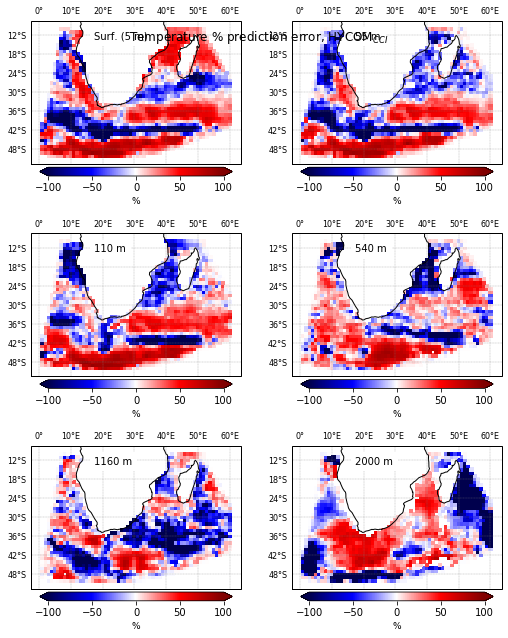

In [46]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm1_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.2 CCI Salinity

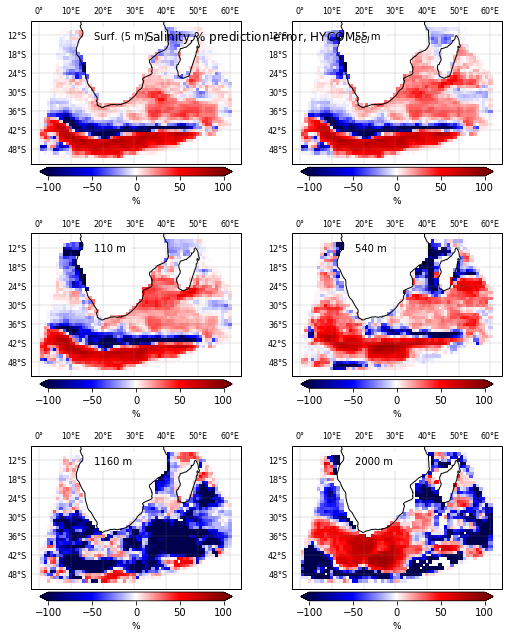

In [9]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm1_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.3 OSTIA Temperature

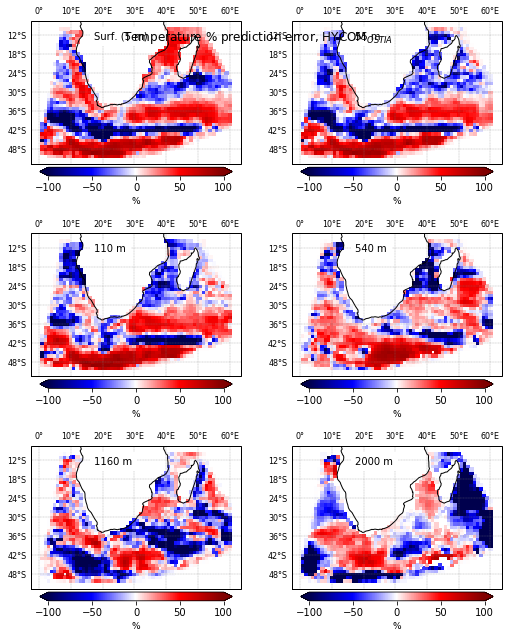

In [11]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm1_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.4 OSTIA Salinity

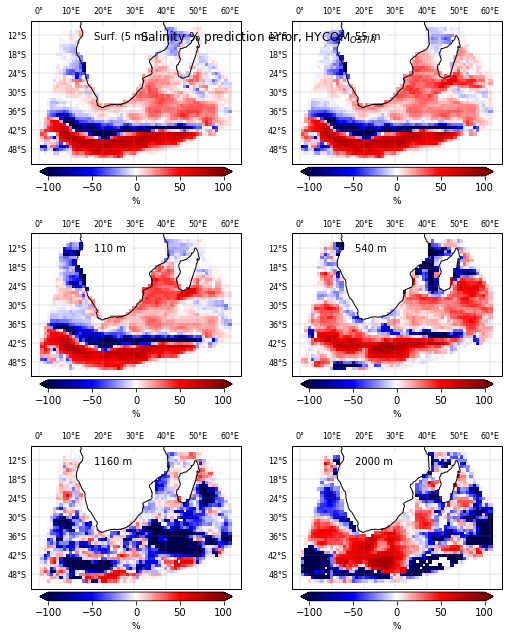

In [13]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm1_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.5 TSSTL2 Temperature

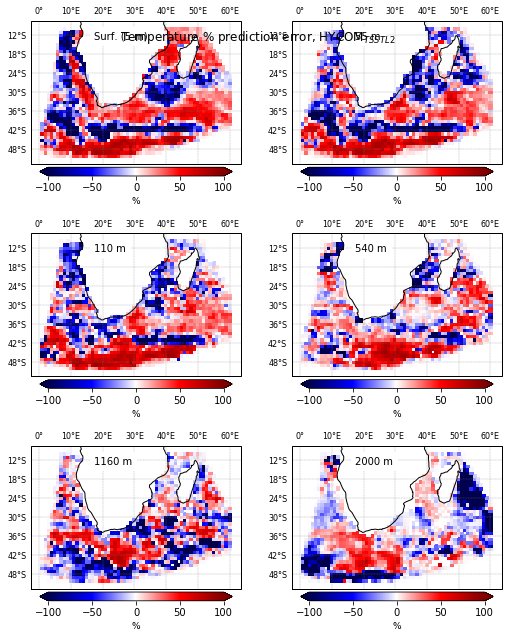

In [22]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.6 TSSTL2 Salinity

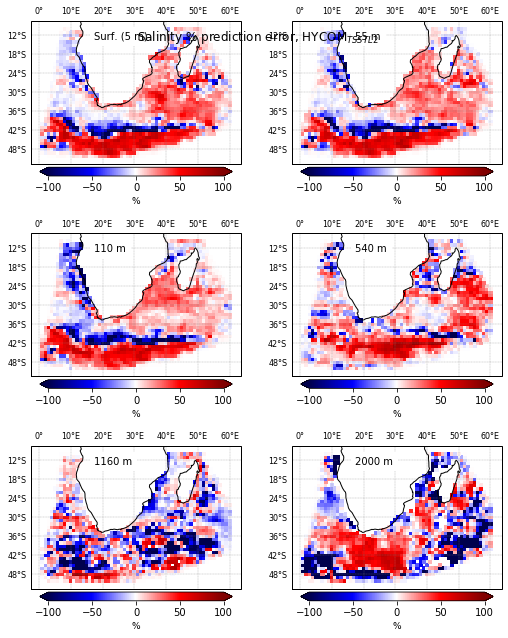

In [23]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.7 TSSTL3 Temperature

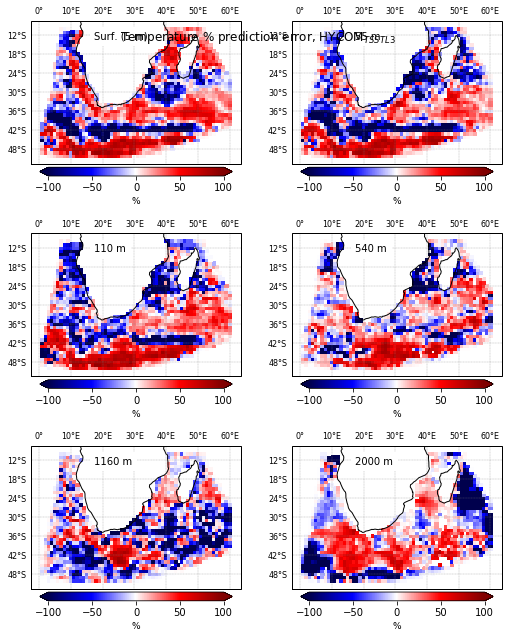

In [24]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sst_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_Norm1_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 1.8 TSSTL3 Salinity

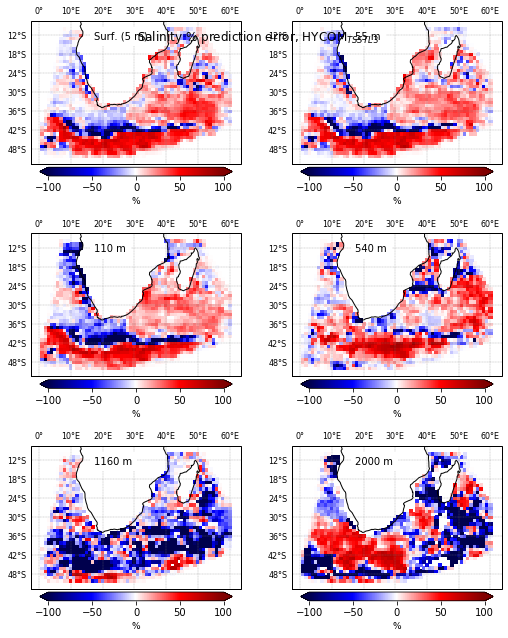

In [25]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_norm1[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_Norm1_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 2. Norm2 (RMSE)

## 2.1 CCI Temperature

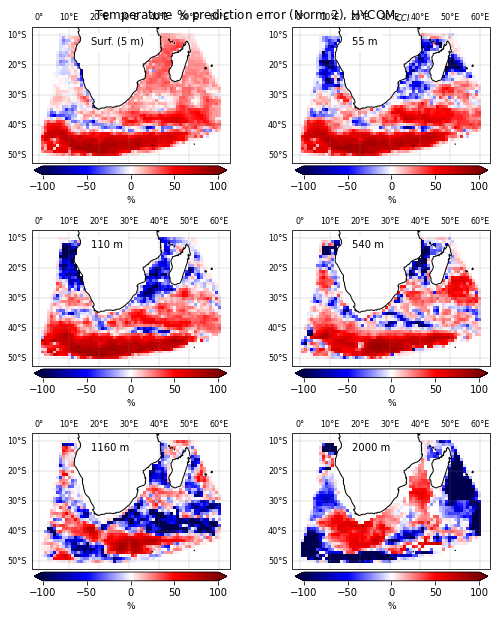

In [10]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm2_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.2 CCI Salinity

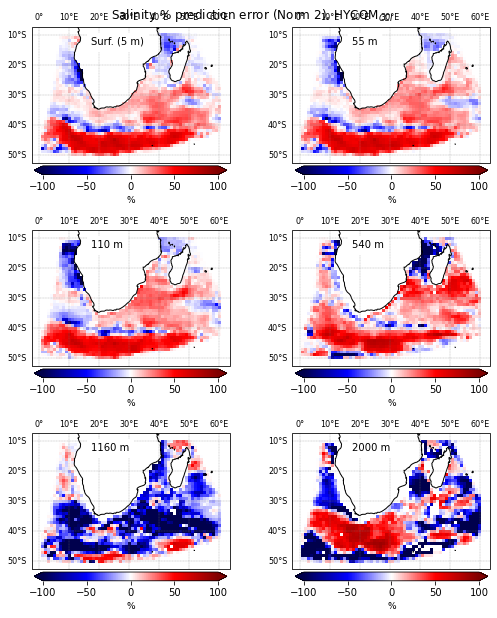

In [12]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm2_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.3 OSTIA Temperature

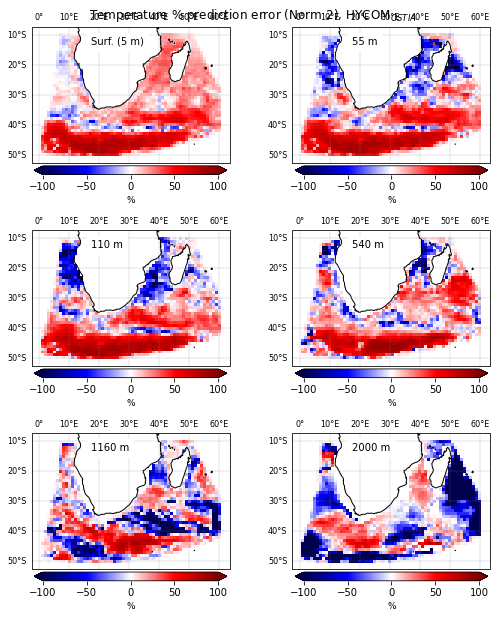

In [13]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm2_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.4 OSTIA Salinity

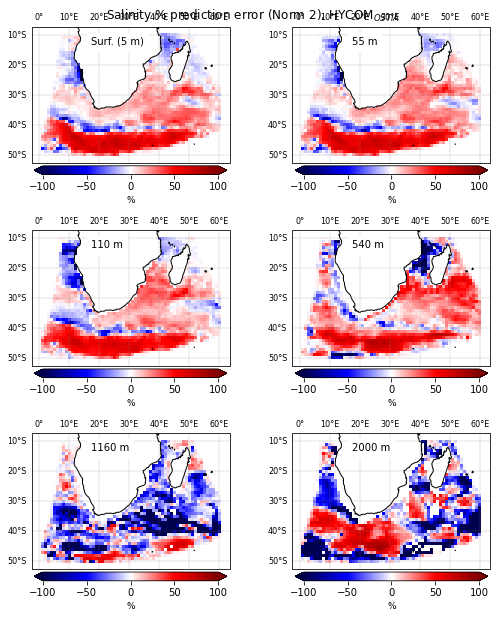

In [15]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm2_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.5 L2L3 Temperature

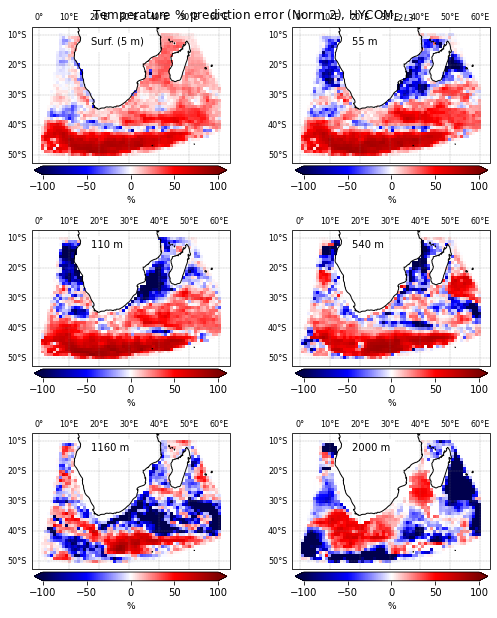

In [18]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{L2L3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = l2l3_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm2_L2L3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.6 L2L3 Salinity

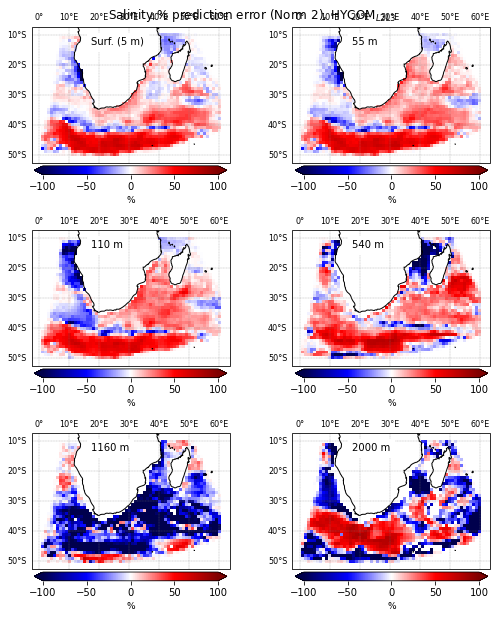

In [20]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{L2L3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = l2l3_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm2_L2L3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.7 L2P Temperature

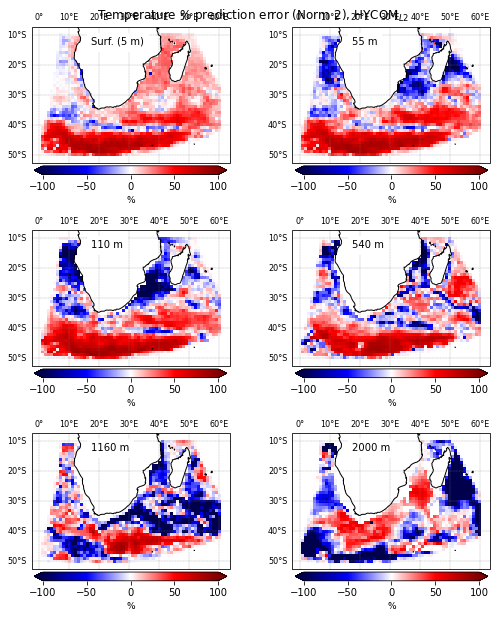

In [22]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature % prediction error (Norm 2), HYCOM$_{L2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = l2_sst_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_Norm2_L2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 2.8 L2P Salinity

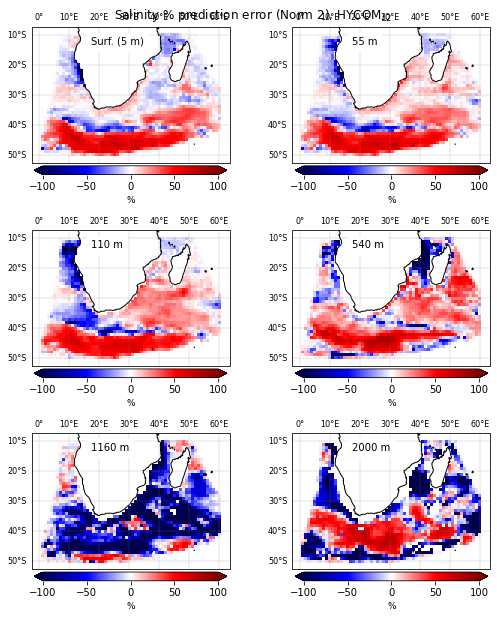

In [24]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity % prediction error (Norm 2), HYCOM$_{L2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = l2_sal_norm2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_Norm2_L2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 3. Horizontal RMSE

### Creating the RMSE variables

In [47]:
# Creating RMSE for CCI analysis
cci_temp_rmse = rmse(ds_hycomcci,'temperature')
cci_sal_rmse = rmse(ds_hycomcci,'salinity')

# Creating RMSE for OSTIA analysis
ostia_temp_rmse = rmse(ds_hycomostia,'temperature')
ostia_sal_rmse = rmse(ds_hycomostia,'salinity')

# # Creating RMSE for CCI TSSTL2 AVHRR
# TSSTL2_temp_rmse = rmse(ds_hycomTSSTL2,'temperature')
# TSSTL2_sal_rmse = rmse(ds_hycomTSSTL2,'salinity')

# # Creating RMSE for CCI TSSTL3 ATSR
# TSSTL3_temp_rmse = rmse(ds_hycomTSSTL3,'temperature')
# TSSTL3_sal_rmse = rmse(ds_hycomTSSTL3,'salinity')

# Creating RMSE for HYCOM FREE
free_temp_rmse = rmse(ds_hycomfree,'temperature')
free_sal_rmse = rmse(ds_hycomfree,'salinity')

## 3.1 CCI Temperature

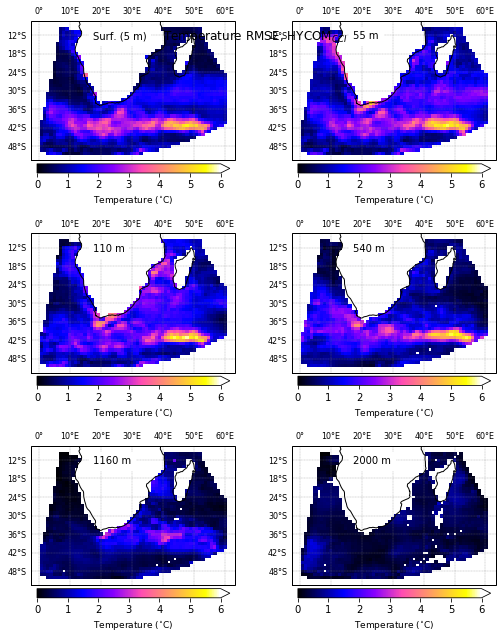

In [48]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RMSE_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.2 CCI Salinity

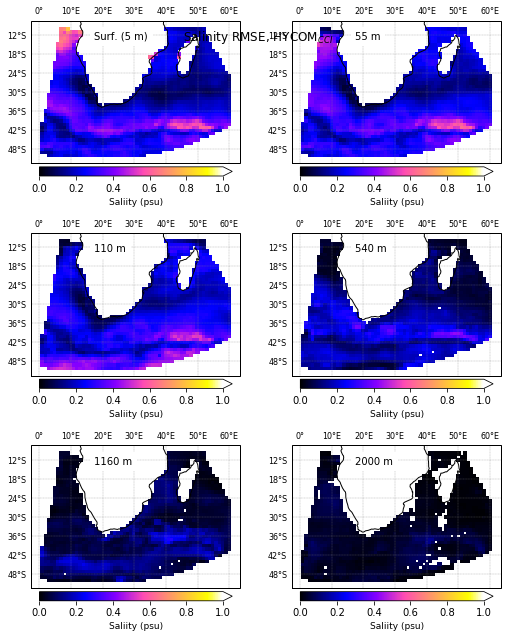

In [26]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = cci_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RMSE_CCI.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.3 OSTIA Temperature

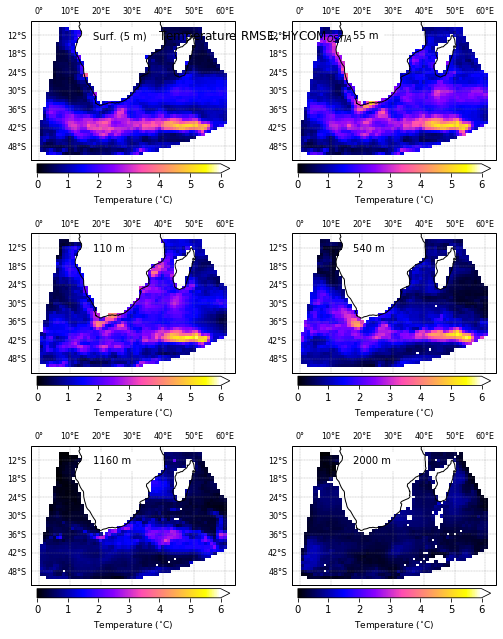

In [28]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RMSE_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.4 OSTIA Salinity

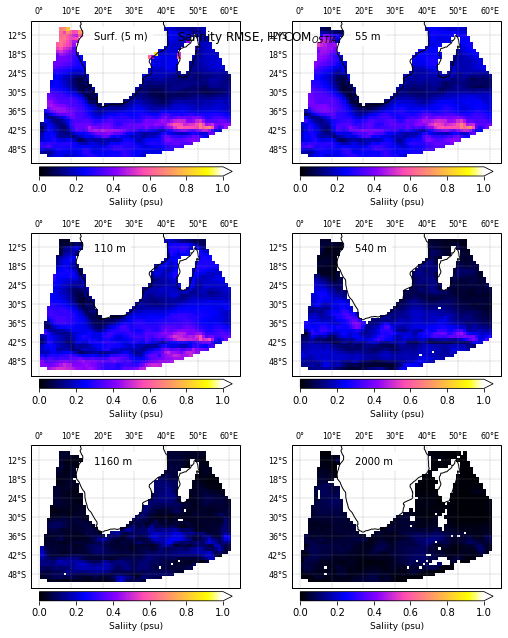

In [30]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{OSTIA}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = ostia_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RMSE_OSTIA.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.5 TSSTL2 Temperature

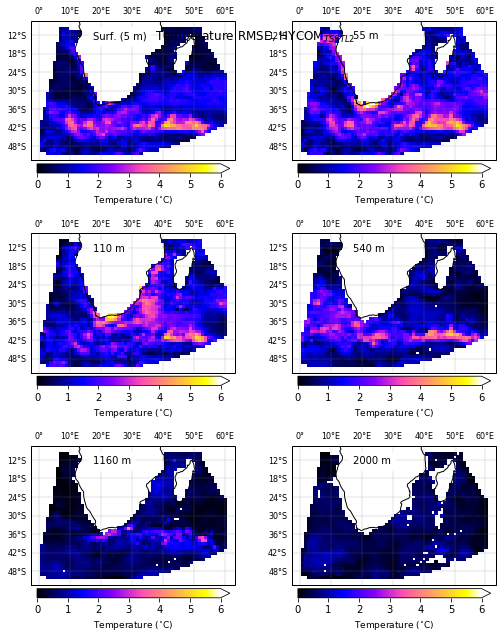

In [61]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.6 TSSTL2 Salinity

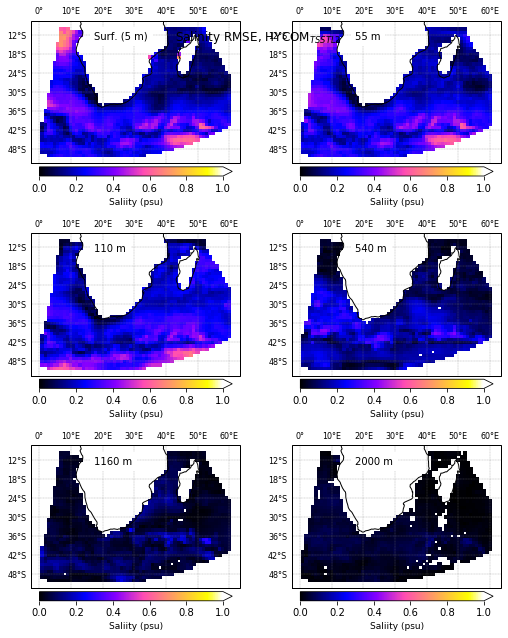

In [62]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL2_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_TSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.7 TSSTL3 Temperature

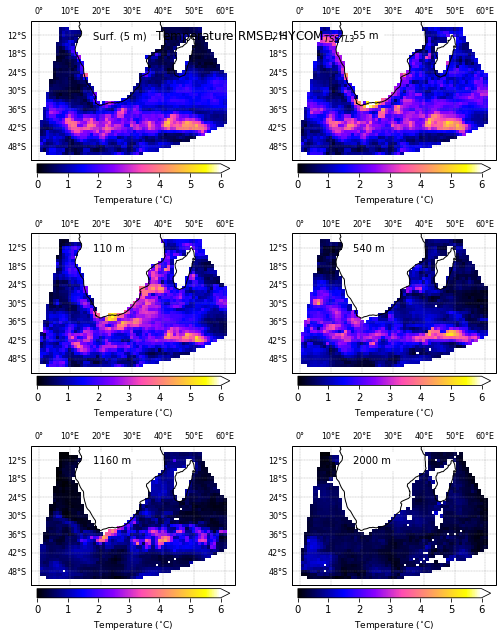

In [63]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RMSE_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.8 TSSTL3 Salinity

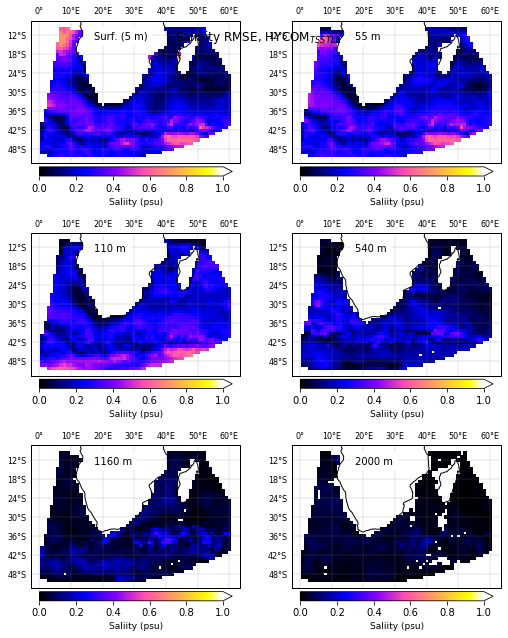

In [64]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = TSSTL3_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RMSE_TSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.9 HYCOM<sub>FREE</sub> Temperature

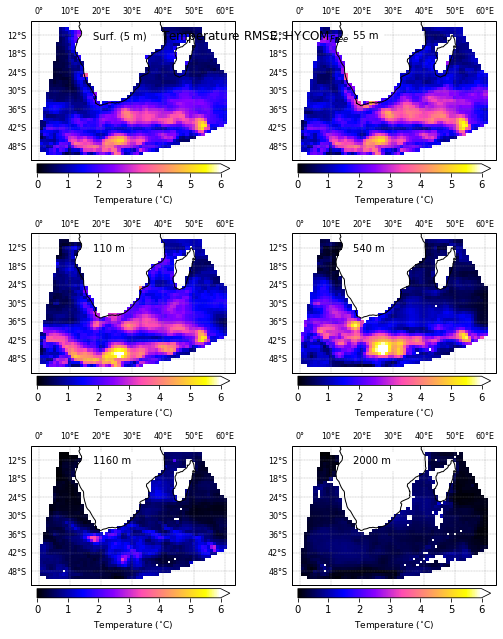

In [32]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temperature RMSE, HYCOM$_{Free}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = free_temp_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=6)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Temperature ($^{\circ}$C)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RMSE_Free.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 3.10 HYCOM<sub>FREE</sub> Salinity

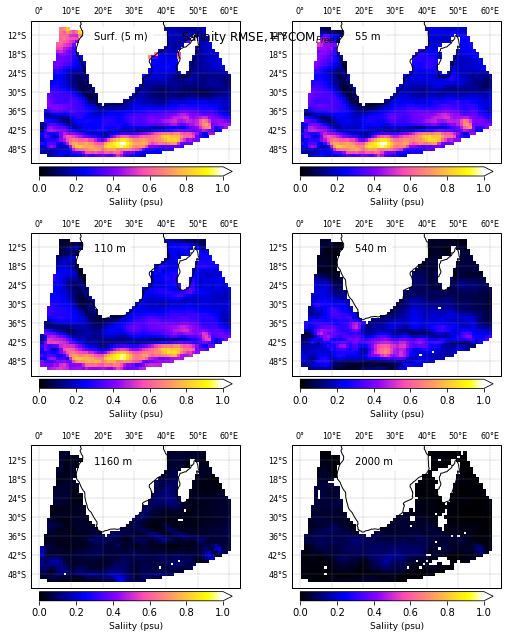

In [34]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Salinity RMSE, HYCOM$_{Free}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = free_sal_rmse[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('gnuplot2'), add_colorbar=False, vmin=0, vmax=1)
    cbar = plt.colorbar(img, shrink=0.8, extend='max', orientation='horizontal', pad=0.02)
    cbar.set_label('Saliity (psu)', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RMSE_Free.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

# 4. "%RRMSE" Plots

## Below is a better version of the plots that follow

It also allows for selection of the variable to compare (temp or sal) and you can choose which datasets to compare. Much more concise than the constant repeating of code found below.

Also my goal is to make a plot more in line with my current MO, to put it into a function and also have it produce a figure that is dissertation ready.

In [70]:
def plotDepthRRMSE(ds_1, id_1, ds_2, id_2, var):
    '''Create a figure of differences in var %RRMSE as
    ds1 - ds2 with subplots of differences at
    Surf. (5 m), 55 m, 110 m, 540 m, 1160 m, and 2000 m depths.
    
    Example usage: plotDepthRRMSE(ds_hycomostia, ds_hycomcci, 'temperature')
    '''
    # Creating the %RRMSE between ds_1 and ds_2
    rrmse_ds = (np.absolute(((rmse(ds_hycomfree, var) - rmse(ds_1, var))
                             / rmse(ds_hycomfree, var)) * 100)
                - np.absolute(((rmse(ds_hycomfree, var) - rmse(ds_2, var))
                               / rmse(ds_hycomfree, var)) * 100))

    proj = ccrs.PlateCarree()
    # layers to plot
    depths = [(0, 'Surf. (5 m)'), (5, '55 m'), (10, '110 m'), (22, '540 m'),
              (26, '1160 m'), (30, '2000 m')]

    fig, axs = plt.subplots(3, 2, figsize = (5.5,6.2), constrained_layout = True,
                            sharex=True, sharey=True, subplot_kw={'projection': proj})
#     fig.suptitle(f'{var} %RRMSE, HYCOM$_{{{id_1}}}$ - HYCOM$_{{{id_2}}}$', y=0.95)
    fig.suptitle(f'{var} %RRMSE, HYCOM$_{{{id_1}}}$ - HYCOM$_{{{id_2}}}$')

    for i, ax in enumerate(axs.flat):
        # Selecting depth layer to plot
        layer = rrmse_ds[depths[i][0]]
    
        # Selecting data beyond 1 standard deviation
        plus_std = (layer.mean(skipna=True) +
                    layer.std(skipna=True))
        minus_std = (layer.mean(skipna=True) -
                     layer.std(skipna=True))
        signif_select = layer.where((layer < minus_std) | (layer > plus_std))
        signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
        signif_layer = signif_select.where(signif_select < 0, other = 1)
        signif_layer = signif_layer.where(signif_layer > 0, other = -1)
        signif_layer = signif_layer * signif_layer_mask
    
        ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
                   cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
        img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                         add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
        ax.set_title('')
        
        ax.coastlines()
        ax.add_feature(cartopy.feature.LAND, zorder=0,
                   facecolor='lightgrey')
    
        # gridline work
        gl = ax.gridlines(crs=proj, color='grey', linewidth=0.3,
                          draw_labels=True, linestyle='dashed')
        gl.top_labels = False
        gl.right_labels = False
        if i == 0:
            gl.bottom_labels = False
            ax.text(0.02, 0.9, 'a)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 1:
            gl.bottom_labels = False
            gl.left_labels = False
            ax.text(0.02, 0.9, 'b)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 2:
            gl.bottom_labels = False
            ax.text(0.02, 0.9, 'c)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 3:
            gl.bottom_labels = False
            gl.left_labels = False
            ax.text(0.02, 0.9, 'd)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 4:
            gl.bottom_labels = True
            gl.left_labels = True
            ax.text(0.02, 0.9, 'e)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        else:
            gl.bottom_labels = True
            gl.left_labels = False
            ax.text(0.02, 0.9, 'f)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 8}
        gl.ylabel_style = {'size': 8}
        
        # Adding depth of subplot as text
        ax.text(0.30,0.87,f'{depths[i][1]}', bbox=dict(facecolor='white', edgecolor='white',
                                                       alpha=1),
                fontsize=10, transform=ax.transAxes)
    
    cbar = plt.colorbar(img, ax=axs[:], location='bottom', shrink=0.5, extend='both',
                        pad=0.02)
#     cbar.set_label('%', fontsize=9)
    cbar.set_label('%')
    
    save_dir = '../Figures/model_interior'
    fig_name = f'{var}_RRMSE_HYCOM{id_1}HYCOM{id_2}_contours.png'
    plt.savefig(f'{save_dir}/{fig_name}', dpi=300, bbox_inches='tight')
    plt.plot()

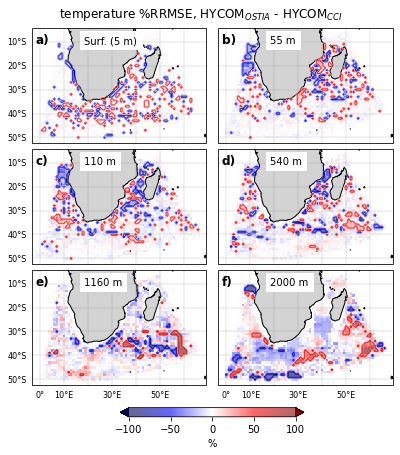

In [72]:
plotDepthRRMSE(ds_hycomostia, 'OSTIA', ds_hycomcci, 'CCI', 'temperature')

## Trying to make a plot that summarises the %RRMSE picture for all depths

Here, my goal is to use either the mean or max (or some other metric) in order to give a summary of the %RRMSE differences in the entire water column. The goal would be to eliminate the need to select arbitrary depths to plot and still get a good picture of the large differences.

In [24]:
def comprehensiveRRMSE(ds_1, id_1, ds_2, id_2):
    '''Create a figure of differences in both temperature and
    salinity %RRMSE as ds1 - ds2 as a mean of all differences
    in the water column (all available depths).
    
    Example usage:
    comprehensiveRRMSE(ds_hycomostia, 'OSTIA', ds_hycomcci, 'CCI')
    '''
    # Creating the %RRMSEs between ds_1 and ds_2
    temp_rrmse_ds = (np.absolute(((rmse(ds_hycomfree, 'temperature')
                                   - rmse(ds_1, 'temperature'))
                                  / rmse(ds_hycomfree, 'temperature')) * 100)
                     - np.absolute(((rmse(ds_hycomfree, 'temperature')
                                     - rmse(ds_2, 'temperature'))
                                    / rmse(ds_hycomfree, 'temperature')) * 100))
    
    sal_rrmse_ds = (np.absolute(((rmse(ds_hycomfree, 'salinity')
                                  - rmse(ds_1, 'salinity'))
                                 / rmse(ds_hycomfree, 'salinity')) * 100)
                    - np.absolute(((rmse(ds_hycomfree, 'salinity')
                                    - rmse(ds_2, 'salinity'))
                                   / rmse(ds_hycomfree, 'salinity')) * 100))

    proj = ccrs.PlateCarree()

    fig, axs = plt.subplots(1, 2, figsize = (6,5), constrained_layout = True,
                            sharex=True, sharey=True, subplot_kw={'projection': proj})

    for i, ax in enumerate(axs.flat):
        # Selecting depth layer to plot
        if i == 0:
            layer = temp_rrmse_ds.mean(axis=0, skipna=True)
            title = 'Temperature'
        else:
            layer = sal_rrmse_ds.mean(axis=0, skipna=True)
            title = 'Salinity'
    
        # Selecting data beyond 1 standard deviation
        plus_std = (layer.mean(skipna=True) +
                    layer.std(skipna=True))
        minus_std = (layer.mean(skipna=True) -
                     layer.std(skipna=True))
        signif_select = layer.where((layer < minus_std) | (layer > plus_std))
        signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
        signif_layer = signif_select.where(signif_select < 0, other = 1)
        signif_layer = signif_layer.where(signif_layer > 0, other = -1)
        signif_layer = signif_layer * signif_layer_mask
    
        ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
                   cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
        img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                         add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
        
        ax.coastlines()
        ax.add_feature(cartopy.feature.LAND, zorder=0,
                   facecolor='lightgrey')
    
        # gridline work
        gl = ax.gridlines(crs=proj, color='grey', linewidth=0.3,
                          draw_labels=True, linestyle='dashed')
        gl.top_labels = False
        gl.right_labels = False
        if i == 0:
            ax.text(0.02, 0.9, 'a)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        else:
            gl.left_labels = False
            ax.text(0.02, 0.9, 'b)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
#         elif i == 2:
#             gl.bottom_labels = False
#             ax.text(0.02, 0.9, 'c)', horizontalalignment='left', verticalalignment='center',
#                     transform=ax.transAxes, fontsize='large', fontweight='semibold')
#         elif i == 3:
#             gl.bottom_labels = False
#             gl.left_labels = False
#             ax.text(0.02, 0.9, 'd)', horizontalalignment='left', verticalalignment='center',
#                     transform=ax.transAxes, fontsize='large', fontweight='semibold')
#         elif i == 4:
#             gl.bottom_labels = True
#             gl.left_labels = True
#             ax.text(0.02, 0.9, 'e)', horizontalalignment='left', verticalalignment='center',
#                     transform=ax.transAxes, fontsize='large', fontweight='semibold')
#         else:
#             gl.bottom_labels = True
#             gl.left_labels = False
#             ax.text(0.02, 0.9, 'f)', horizontalalignment='left', verticalalignment='center',
#                     transform=ax.transAxes, fontsize='large', fontweight='semibold')
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 8}
        gl.ylabel_style = {'size': 8}
        
        ax.set_title(f'{title}')
    
    cbar = plt.colorbar(img, ax=axs[:], location='bottom', shrink=0.5, extend='both',
                        pad=0.02)
#     cbar.set_label('%', fontsize=9)
    cbar.set_label('%')
    
    save_dir = '../Figures/model_interior'
    fig_name = f'comp_RRMSE_HYCOM{id_1}HYCOM{id_2}_contours.png'
    plt.savefig(f'{save_dir}/{fig_name}', dpi=300, bbox_inches='tight')
    plt.plot()

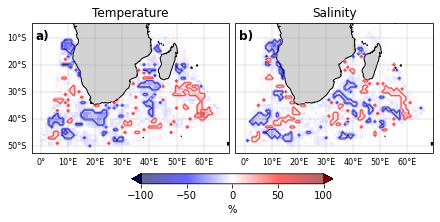

In [23]:
comprehensiveRRMSE(ds_hycomostia, 'OSTIA', ds_hycomcci, 'CCI')

## Creating each %RRMSE variable

In [6]:
# OSTIA - CCI
temp_rrmse_ostia_cci = (np.absolute(((rmse(ds_hycomfree, 'temperature')
                                      - rmse(ds_hycomostia, 'temperature'))
                                     / rmse(ds_hycomfree, 'temperature')) * 100)
                        - np.absolute(((rmse(ds_hycomfree, 'temperature')
                                        - rmse(ds_hycomcci, 'temperature'))
                                       / rmse(ds_hycomfree, 'temperature')) * 100))

sal_rrmse_ostia_cci = (np.absolute(((rmse(ds_hycomfree, 'salinity')
                                     - rmse(ds_hycomostia, 'salinity'))
                                    / rmse(ds_hycomfree, 'salinity')) * 100)
                       - np.absolute(((rmse(ds_hycomfree, 'salinity')
                                       - rmse(ds_hycomcci, 'salinity'))
                                      / rmse(ds_hycomfree, 'salinity')) * 100))

# CCI - L2L3
# temp_rrmse_cci_l2l3 = ((np.absolute(((rmse(ds_hycomfree, 'temperature')
#                                       - rmse(ds_hycomcci, 'temperature'))
#                                      / rmse(ds_hycomfree, 'temperature')) * 100))
#                        - np.absolute(((rmse(ds_hycomfree, 'temperature')
#                                        - rmse(ds_hycoml2l3, 'temperature'))
#                                       / rmse(ds_hycomfree, 'temperature')) * 100))

# sal_rrmse_cci_l2l3 = ((np.absolute(((rmse(ds_hycomfree, 'salinity')
#                                      - rmse(ds_hycomcci, 'salinity'))
#                                     / rmse(ds_hycomfree, 'salinity')) * 100))
#                       - np.absolute(((rmse(ds_hycomfree, 'salinity')
#                                       - rmse(ds_hycoml2l3, 'salinity'))
#                                      / rmse(ds_hycomfree, 'salinity')) * 100))

# CCI - L2P
# temp_rrmse_cci_l2 = ((np.absolute(((rmse(ds_hycomfree, 'temperature')
#                                     - rmse(ds_hycomcci, 'temperature'))
#                                    / rmse(ds_hycomfree, 'temperature')) * 100))
#                      - np.absolute(((rmse(ds_hycomfree, 'temperature')
#                                      - rmse(ds_hycoml2, 'temperature'))
#                                     / rmse(ds_hycomfree, 'temperature')) * 100))

# sal_rrmse_cci_l2 = ((np.absolute(((rmse(ds_hycomfree, 'salinity')
#                                    - rmse(ds_hycomcci, 'salinity'))
#                                   / rmse(ds_hycomfree, 'salinity')) * 100))
#                     - np.absolute(((rmse(ds_hycomfree, 'salinity')
#                                     - rmse(ds_hycoml2, 'salinity'))
#                                    / rmse(ds_hycomfree, 'salinity')) * 100))

# Saving RRMSE for plotting in profile plotting notebook
# #   cci - ostia
# temp_rrmse_ostia_cci.to_netcdf('../Data/OSTIA_CCI_temp_RRMSE.nc')
# sal_rrmse_ostia_cci.to_netcdf('../Data/OSTIA_CCI_sal_RRMSE.nc')
# #   cci - l2l3
# temp_rrmse_cci_l2l3.to_netcdf('../Data/CCI_L2L3_temp_RRMSE.nc')
# sal_rrmse_cci_l2l3.to_netcdf('../Data/CCI_L2L3_sal_RRMSE.nc')
# #   cci - l2
# temp_rrmse_cci_l2.to_netcdf('../Data/CCI_L2_temp_RRMSE.nc')
# sal_rrmse_cci_l2.to_netcdf('../Data/CCI_L2_sal_RRMSE.nc')

#----------------------------------------------------------------------------------------

# # CCI - TSSTL3
# temp_rrmse_cci_TSSTL3 = np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomcci, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100) - np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL3, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100)
# sal_rrmse_cci_TSSTL3 = np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomcci, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100) - np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL3, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100)

# # CCI - TSSTL2
# temp_rrmse_cci_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomcci, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100) - np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL2, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100)
# sal_rrmse_cci_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomcci, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100) - np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL2, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100)

# # TSSTL3 - TSSTL2
# temp_rrmse_TSSTL3_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL3, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100) - np.absolute(((rmse(ds_hycomfree, 'temperature') - rmse(ds_hycomTSSTL2, 'temperature')) / rmse(ds_hycomfree, 'temperature')) * 100)
# sal_rrmse_TSSTL3_TSSTL2 = np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL3, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100) - np.absolute(((rmse(ds_hycomfree, 'salinity') - rmse(ds_hycomTSSTL2, 'salinity')) / rmse(ds_hycomfree, 'salinity')) * 100)

## 4.1 HYCOM<sub>OSTIA</sub> - HYCOM<sub>CCI</sub>

### 4.1.1 Temperature

[]

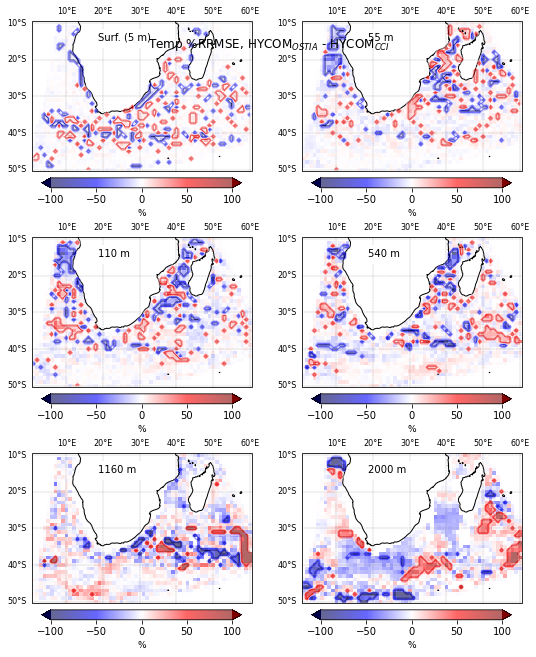

In [67]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9), constrained_layout = True)
fig.suptitle('Temp %RRMSE, HYCOM$_{OSTIA}$ - HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = temp_rrmse_ostia_cci[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (temp_rrmse_ostia_cci[depths[s]].mean(skipna=True) +
                temp_rrmse_ostia_cci[depths[s]].std(skipna=True))
    minus_std = (temp_rrmse_ostia_cci[depths[s]].mean(skipna=True) -
                temp_rrmse_ostia_cci[depths[s]].std(skipna=True))
    signif_select = temp_rrmse_ostia_cci[depths[s]].where((temp_rrmse_ostia_cci[depths[s]] <
                                                          minus_std) | 
                                                         (temp_rrmse_ostia_cci[depths[s]] >
                                                          plus_std))
    signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
    signif_layer = signif_select.where(signif_select < 0, other = 1)
    signif_layer = signif_layer.where(signif_layer > 0, other = -1)
    signif_layer = signif_layer * signif_layer_mask
    
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
# plt.savefig('../Figures/model_interior/Temp_RRMSE_HYCOMostiaHYCOMcci_contours.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
# fig.canvas.draw()

## Making a better version of this plot

Here my goal is to make a plot more in line with my current MO, to put it into a function and also have it produce a figure that is dissertation ready.

In [70]:
def plotDepthRRMSE(ds_1, id_1, ds_2, id_2, var):
    '''Create a figure of differences in var %RRMSE as
    ds1 - ds2 with subplots of differences at
    Surf. (5 m), 55 m, 110 m, 540 m, 1160 m, and 2000 m depths.
    
    Example usage: plotDepthRRMSE(ds_hycomostia, ds_hycomcci, 'temperature')
    '''
    # Creating the %RRMSE between ds_1 and ds_2
    rrmse_ds = (np.absolute(((rmse(ds_hycomfree, var) - rmse(ds_1, var))
                             / rmse(ds_hycomfree, var)) * 100)
                - np.absolute(((rmse(ds_hycomfree, var) - rmse(ds_2, var))
                               / rmse(ds_hycomfree, var)) * 100))

    proj = ccrs.PlateCarree()
    # layers to plot
    depths = [(0, 'Surf. (5 m)'), (5, '55 m'), (10, '110 m'), (22, '540 m'),
              (26, '1160 m'), (30, '2000 m')]

    fig, axs = plt.subplots(3, 2, figsize = (5.5,6.2), constrained_layout = True,
                            sharex=True, sharey=True, subplot_kw={'projection': proj})
#     fig.suptitle(f'{var} %RRMSE, HYCOM$_{{{id_1}}}$ - HYCOM$_{{{id_2}}}$', y=0.95)
    fig.suptitle(f'{var} %RRMSE, HYCOM$_{{{id_1}}}$ - HYCOM$_{{{id_2}}}$')

    for i, ax in enumerate(axs.flat):
        # Selecting depth layer to plot
        layer = rrmse_ds[depths[i][0]]
    
        # Selecting data beyond 1 standard deviation
        plus_std = (layer.mean(skipna=True) +
                    layer.std(skipna=True))
        minus_std = (layer.mean(skipna=True) -
                     layer.std(skipna=True))
        signif_select = layer.where((layer < minus_std) | (layer > plus_std))
        signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
        signif_layer = signif_select.where(signif_select < 0, other = 1)
        signif_layer = signif_layer.where(signif_layer > 0, other = -1)
        signif_layer = signif_layer * signif_layer_mask
    
        ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
                   cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
        img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                         add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
        ax.set_title('')
        
        ax.coastlines()
        ax.add_feature(cartopy.feature.LAND, zorder=0,
                   facecolor='lightgrey')
    
        # gridline work
        gl = ax.gridlines(crs=proj, color='grey', linewidth=0.3,
                          draw_labels=True, linestyle='dashed')
        gl.top_labels = False
        gl.right_labels = False
        if i == 0:
            gl.bottom_labels = False
            ax.text(0.02, 0.9, 'a)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 1:
            gl.bottom_labels = False
            gl.left_labels = False
            ax.text(0.02, 0.9, 'b)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 2:
            gl.bottom_labels = False
            ax.text(0.02, 0.9, 'c)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 3:
            gl.bottom_labels = False
            gl.left_labels = False
            ax.text(0.02, 0.9, 'd)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        elif i == 4:
            gl.bottom_labels = True
            gl.left_labels = True
            ax.text(0.02, 0.9, 'e)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        else:
            gl.bottom_labels = True
            gl.left_labels = False
            ax.text(0.02, 0.9, 'f)', horizontalalignment='left', verticalalignment='center',
                    transform=ax.transAxes, fontsize='large', fontweight='semibold')
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 8}
        gl.ylabel_style = {'size': 8}
        
        # Adding depth of subplot as text
        ax.text(0.30,0.87,f'{depths[i][1]}', bbox=dict(facecolor='white', edgecolor='white',
                                                       alpha=1),
                fontsize=10, transform=ax.transAxes)
    
    cbar = plt.colorbar(img, ax=axs[:], location='bottom', shrink=0.5, extend='both',
                        pad=0.02)
#     cbar.set_label('%', fontsize=9)
    cbar.set_label('%')
    
    save_dir = '../Figures/model_interior'
    fig_name = f'{var}_RRMSE_HYCOM{id_1}HYCOM{id_2}_contours.png'
    plt.savefig(f'{save_dir}/{fig_name}', dpi=300, bbox_inches='tight')
    plt.plot()

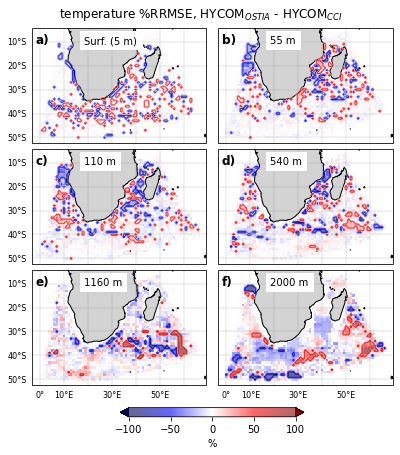

In [72]:
plotDepthRRMSE(ds_hycomostia, 'OSTIA', ds_hycomcci, 'CCI', 'temperature')

## 4.1.2 Salinity

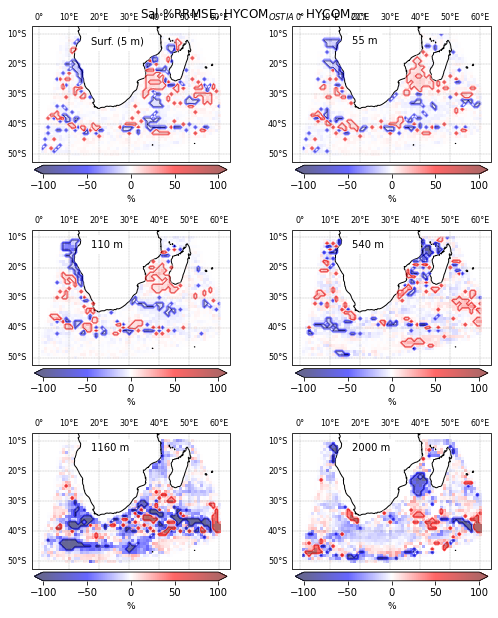

In [18]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{OSTIA}$ - HYCOM$_{CCI}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = sal_rrmse_ostia_cci[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (sal_rrmse_ostia_cci[depths[s]].mean(skipna=True) +
                sal_rrmse_ostia_cci[depths[s]].std(skipna=True))
    minus_std = (sal_rrmse_ostia_cci[depths[s]].mean(skipna=True) -
                sal_rrmse_ostia_cci[depths[s]].std(skipna=True))
    signif_select = sal_rrmse_ostia_cci[depths[s]].where((sal_rrmse_ostia_cci[depths[s]] <
                                                          minus_std) | 
                                                         (sal_rrmse_ostia_cci[depths[s]] >
                                                          plus_std))
    signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
    signif_layer = signif_select.where(signif_select < 0, other = 1)
    signif_layer = signif_layer.where(signif_layer > 0, other = -1)
    signif_layer = signif_layer * signif_layer_mask
    
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RRMSE_HYCOMostiaHYCOMcci_new.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.2 HYCOM<sub>CCI</sub> - HYCOM<sub>L2L3</sub>

### 4.2.1 Temperature

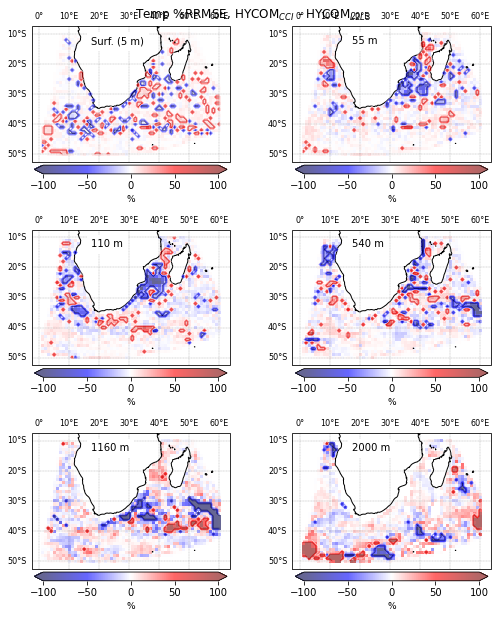

In [19]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{L2L3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = temp_rrmse_cci_l2l3[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (temp_rrmse_cci_l2l3[depths[s]].mean(skipna=True) +
                temp_rrmse_cci_l2l3[depths[s]].std(skipna=True))
    minus_std = (temp_rrmse_cci_l2l3[depths[s]].mean(skipna=True) -
                temp_rrmse_cci_l2l3[depths[s]].std(skipna=True))
    signif_select = temp_rrmse_cci_l2l3[depths[s]].where((temp_rrmse_cci_l2l3[depths[s]] <
                                                          minus_std) | 
                                                         (temp_rrmse_cci_l2l3[depths[s]] >
                                                          plus_std))
    signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
    signif_layer = signif_select.where(signif_select < 0, other = 1)
    signif_layer = signif_layer.where(signif_layer > 0, other = -1)
    signif_layer = signif_layer * signif_layer_mask
    
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3,
                      draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i),
            bbox=dict(facecolor='white', edgecolor='white', alpha=1),
            fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RRMSE_HYCOMcciHYCOMl2l3_contours.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.2.2 Salinity

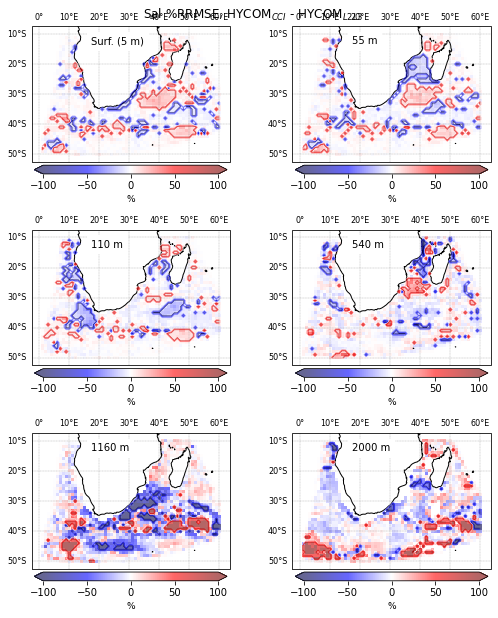

In [20]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{L2L3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = sal_rrmse_cci_l2l3[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (sal_rrmse_cci_l2l3[depths[s]].mean(skipna=True) +
                sal_rrmse_cci_l2l3[depths[s]].std(skipna=True))
    minus_std = (sal_rrmse_cci_l2l3[depths[s]].mean(skipna=True) -
                sal_rrmse_cci_l2l3[depths[s]].std(skipna=True))
    signif_select = sal_rrmse_cci_l2l3[depths[s]].where((sal_rrmse_cci_l2l3[depths[s]] <
                                                          minus_std) | 
                                                         (sal_rrmse_cci_l2l3[depths[s]] >
                                                          plus_std))
    signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
    signif_layer = signif_select.where(signif_select < 0, other = 1)
    signif_layer = signif_layer.where(signif_layer > 0, other = -1)
    signif_layer = signif_layer * signif_layer_mask
    
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3,
                      draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i),
            bbox=dict(facecolor='white', edgecolor='white', alpha=1),
            fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RRMSE_HYCOMcciHYCOMl2l3_contours.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.3 HYCOM<sub>CCI</sub> - HYCOM<sub>L2</sub>

### 4.3.1 Temperature

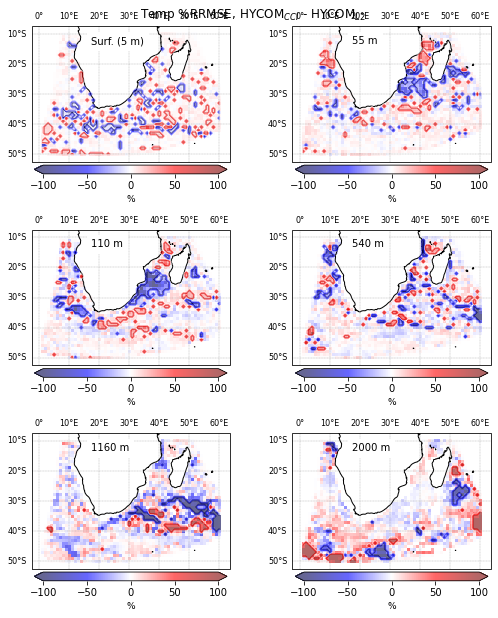

In [23]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{L2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = temp_rrmse_cci_l2[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (temp_rrmse_cci_l2[depths[s]].mean(skipna=True) +
                temp_rrmse_cci_l2[depths[s]].std(skipna=True))
    minus_std = (temp_rrmse_cci_l2[depths[s]].mean(skipna=True) -
                 temp_rrmse_cci_l2[depths[s]].std(skipna=True))
    signif_select = temp_rrmse_cci_l2[depths[s]].where((temp_rrmse_cci_l2[depths[s]] <
                                                        minus_std) |
                                                       (temp_rrmse_cci_l2[depths[s]] >
                                                        plus_std))
    signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
    signif_layer = signif_select.where(signif_select < 0, other = 1)
    signif_layer = signif_layer.where(signif_layer > 0, other = -1)
    signif_layer = signif_layer * signif_layer_mask
    
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3,
                      draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i),
            bbox=dict(facecolor='white', edgecolor='white', alpha=1),
            fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Temp_RRMSE_HYCOMcciHYCOMl2_contours.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.3.2 Salinity

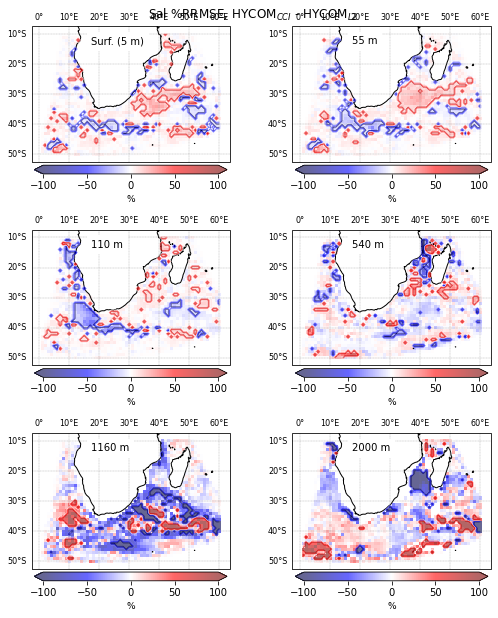

In [24]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{L2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    # Selecting depth layer to plot
    layer = sal_rrmse_cci_l2[depths[s]]
    
    # Selecting data beyond 1 standard deviation
    plus_std = (sal_rrmse_cci_l2[depths[s]].mean(skipna=True) +
                sal_rrmse_cci_l2[depths[s]].std(skipna=True))
    minus_std = (sal_rrmse_cci_l2[depths[s]].mean(skipna=True) -
                sal_rrmse_cci_l2[depths[s]].std(skipna=True))
    signif_select = sal_rrmse_cci_l2[depths[s]].where((sal_rrmse_cci_l2[depths[s]] <
                                                          minus_std) | 
                                                         (sal_rrmse_cci_l2[depths[s]] >
                                                          plus_std))
    signif_layer_mask = (signif_select.notnull()).astype('int') # make 1-and-zeros mask
    signif_layer = signif_select.where(signif_select < 0, other = 1)
    signif_layer = signif_layer.where(signif_layer > 0, other = -1)
    signif_layer = signif_layer * signif_layer_mask
    
    ax.contour(signif_layer['longitude'], signif_layer['latitude'], signif_layer,
               cmap=plt.get_cmap('seismic'), linewidths=0.4, alpha=1)
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'),
                     add_colorbar=False, vmin=-100, vmax=100, alpha=0.6)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3,
                      draw_labels=True, linestyle='dashed')
    gl.top_labels = True
    gl.bottom_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i),
            bbox=dict(facecolor='white', edgecolor='white', alpha=1),
            fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Sal_RRMSE_HYCOMcciHYCOMl2_contours.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.4 HYCOM<sub>CCI</sub> - HYCOM<sub>TSSTL3</sub>

### 4.4.1 Temperature

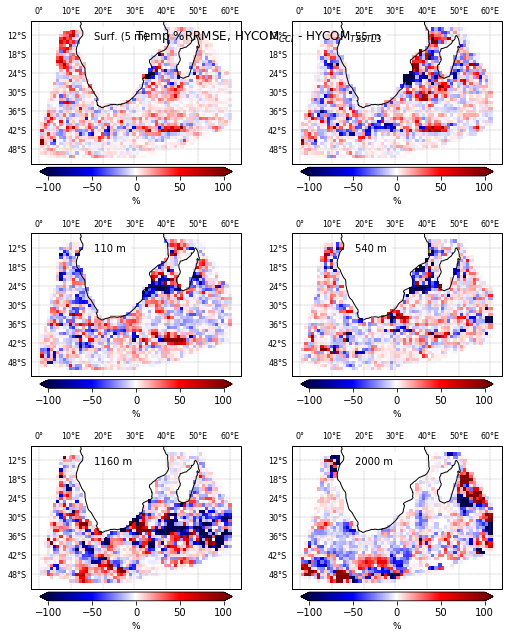

In [12]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = temp_rrmse_cci_TSSTL3[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RRMSE_HYCOMcciHYCOMTSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.4.2 Salinity

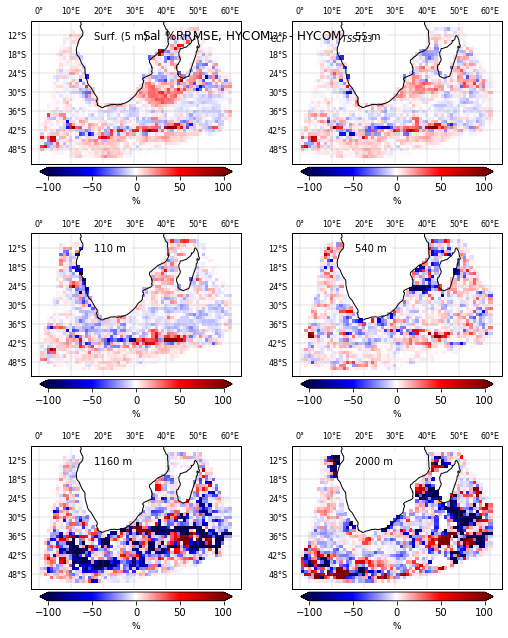

In [13]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL3}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = sal_rrmse_cci_TSSTL3[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RRMSE_HYCOMcciHYCOMTSSTL3.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.5 HYCOM<sub>CCI</sub> - HYCOM<sub>TSSTL2</sub>

### 4.5.1 Temperature

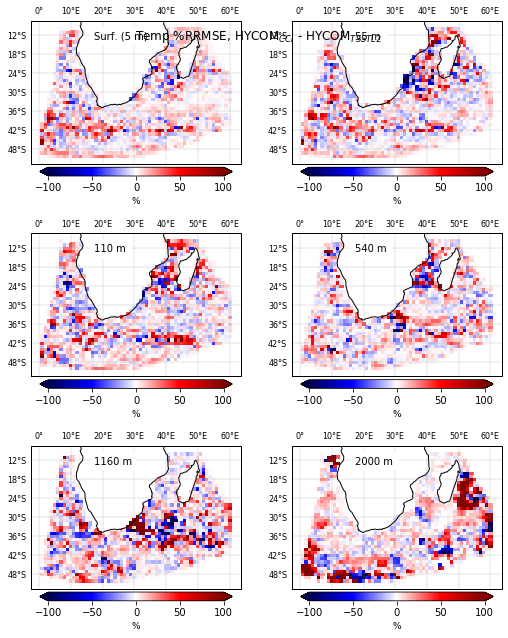

In [14]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = temp_rrmse_cci_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RRMSE_HYCOMcciHYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.5.2 Salinity

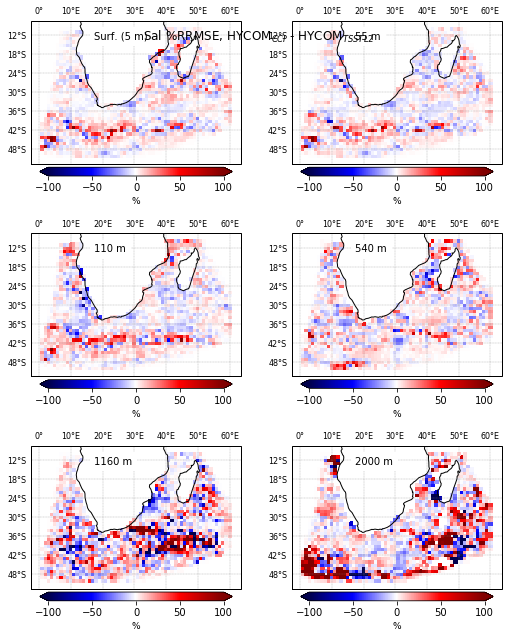

In [15]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{CCI}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = sal_rrmse_cci_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RRMSE_HYCOMcciHYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.6 HYCOM<sub>TSSTL3</sub> - HYCOM<sub>TSSTL2</sub>

### 4.6.1 Temperature

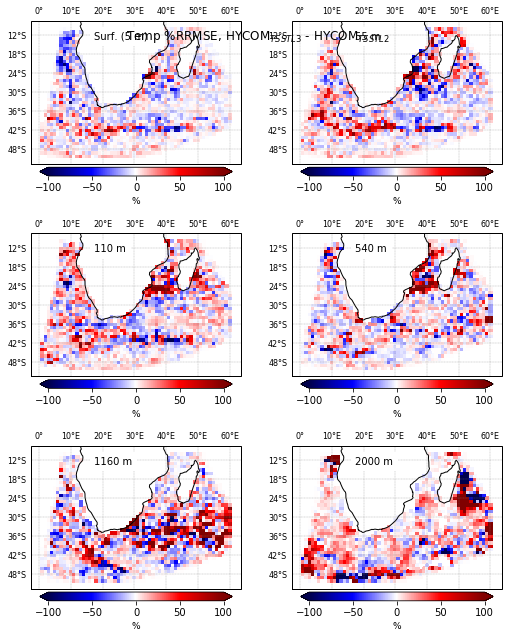

In [16]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Temp %RRMSE, HYCOM$_{TSSTL3}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = temp_rrmse_TSSTL3_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Temp_RRMSE_HYCOMTSSTL3HYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()

## 4.6.2 Salinity

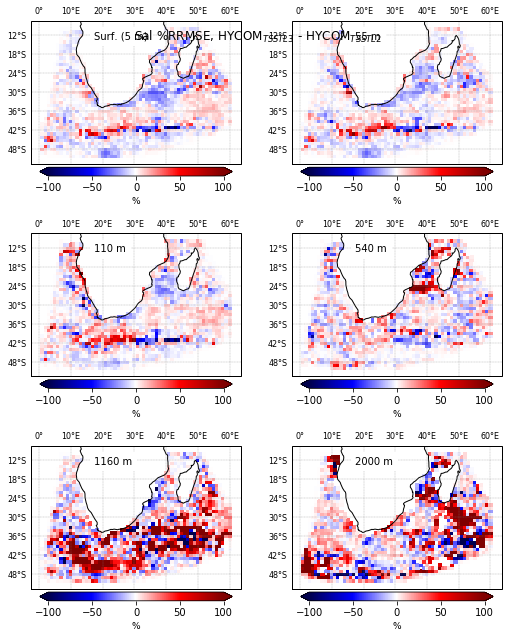

In [17]:
proj = ccrs.PlateCarree()
depth_labels = ['Surf. (5 m)', '55 m', '110 m', '540 m', '1160 m', '2000 m']
depths = [0, 5, 10, 22, 26, 30]

fig = plt.figure(figsize=(7.5,9))
fig.suptitle('Sal %RRMSE, HYCOM$_{TSSTL3}$ - HYCOM$_{TSSTL2}$', y=0.95)

for s, i in enumerate(depth_labels):
    
    ax = plt.subplot(3,2,s+1,projection=proj)
    
    layer = sal_rrmse_TSSTL3_TSSTL2[depths[s]]
    
    img = layer.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('seismic'), add_colorbar=False, vmin=-100, vmax=100)
    cbar = plt.colorbar(img, shrink=0.8, extend='both', orientation='horizontal', pad=0.02)
    cbar.set_label('%', fontsize=9)
    ax.coastlines()
    
    # gridline work
    gl = ax.gridlines(crs=ccrs.PlateCarree(), color='grey', linewidth=0.3, draw_labels=True, linestyle='dashed')
    gl.xlabels_top = True
    gl.xlabels_bottom = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    
    ax.text(0.30,0.87,'{0}'.format(i), bbox=dict(facecolor='white', edgecolor='white', alpha=1), fontsize=10, transform=ax.transAxes)
    ax.set_title('')
    
plt.savefig('../Figures/model_interior/Short_Sal_RRMSE_HYCOMTSSTL3HYCOMTSSTL2.png', dpi=300, bbox_inches='tight', format='png')
plt.plot()
fig.canvas.draw()
fig.tight_layout()